In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

In [16]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

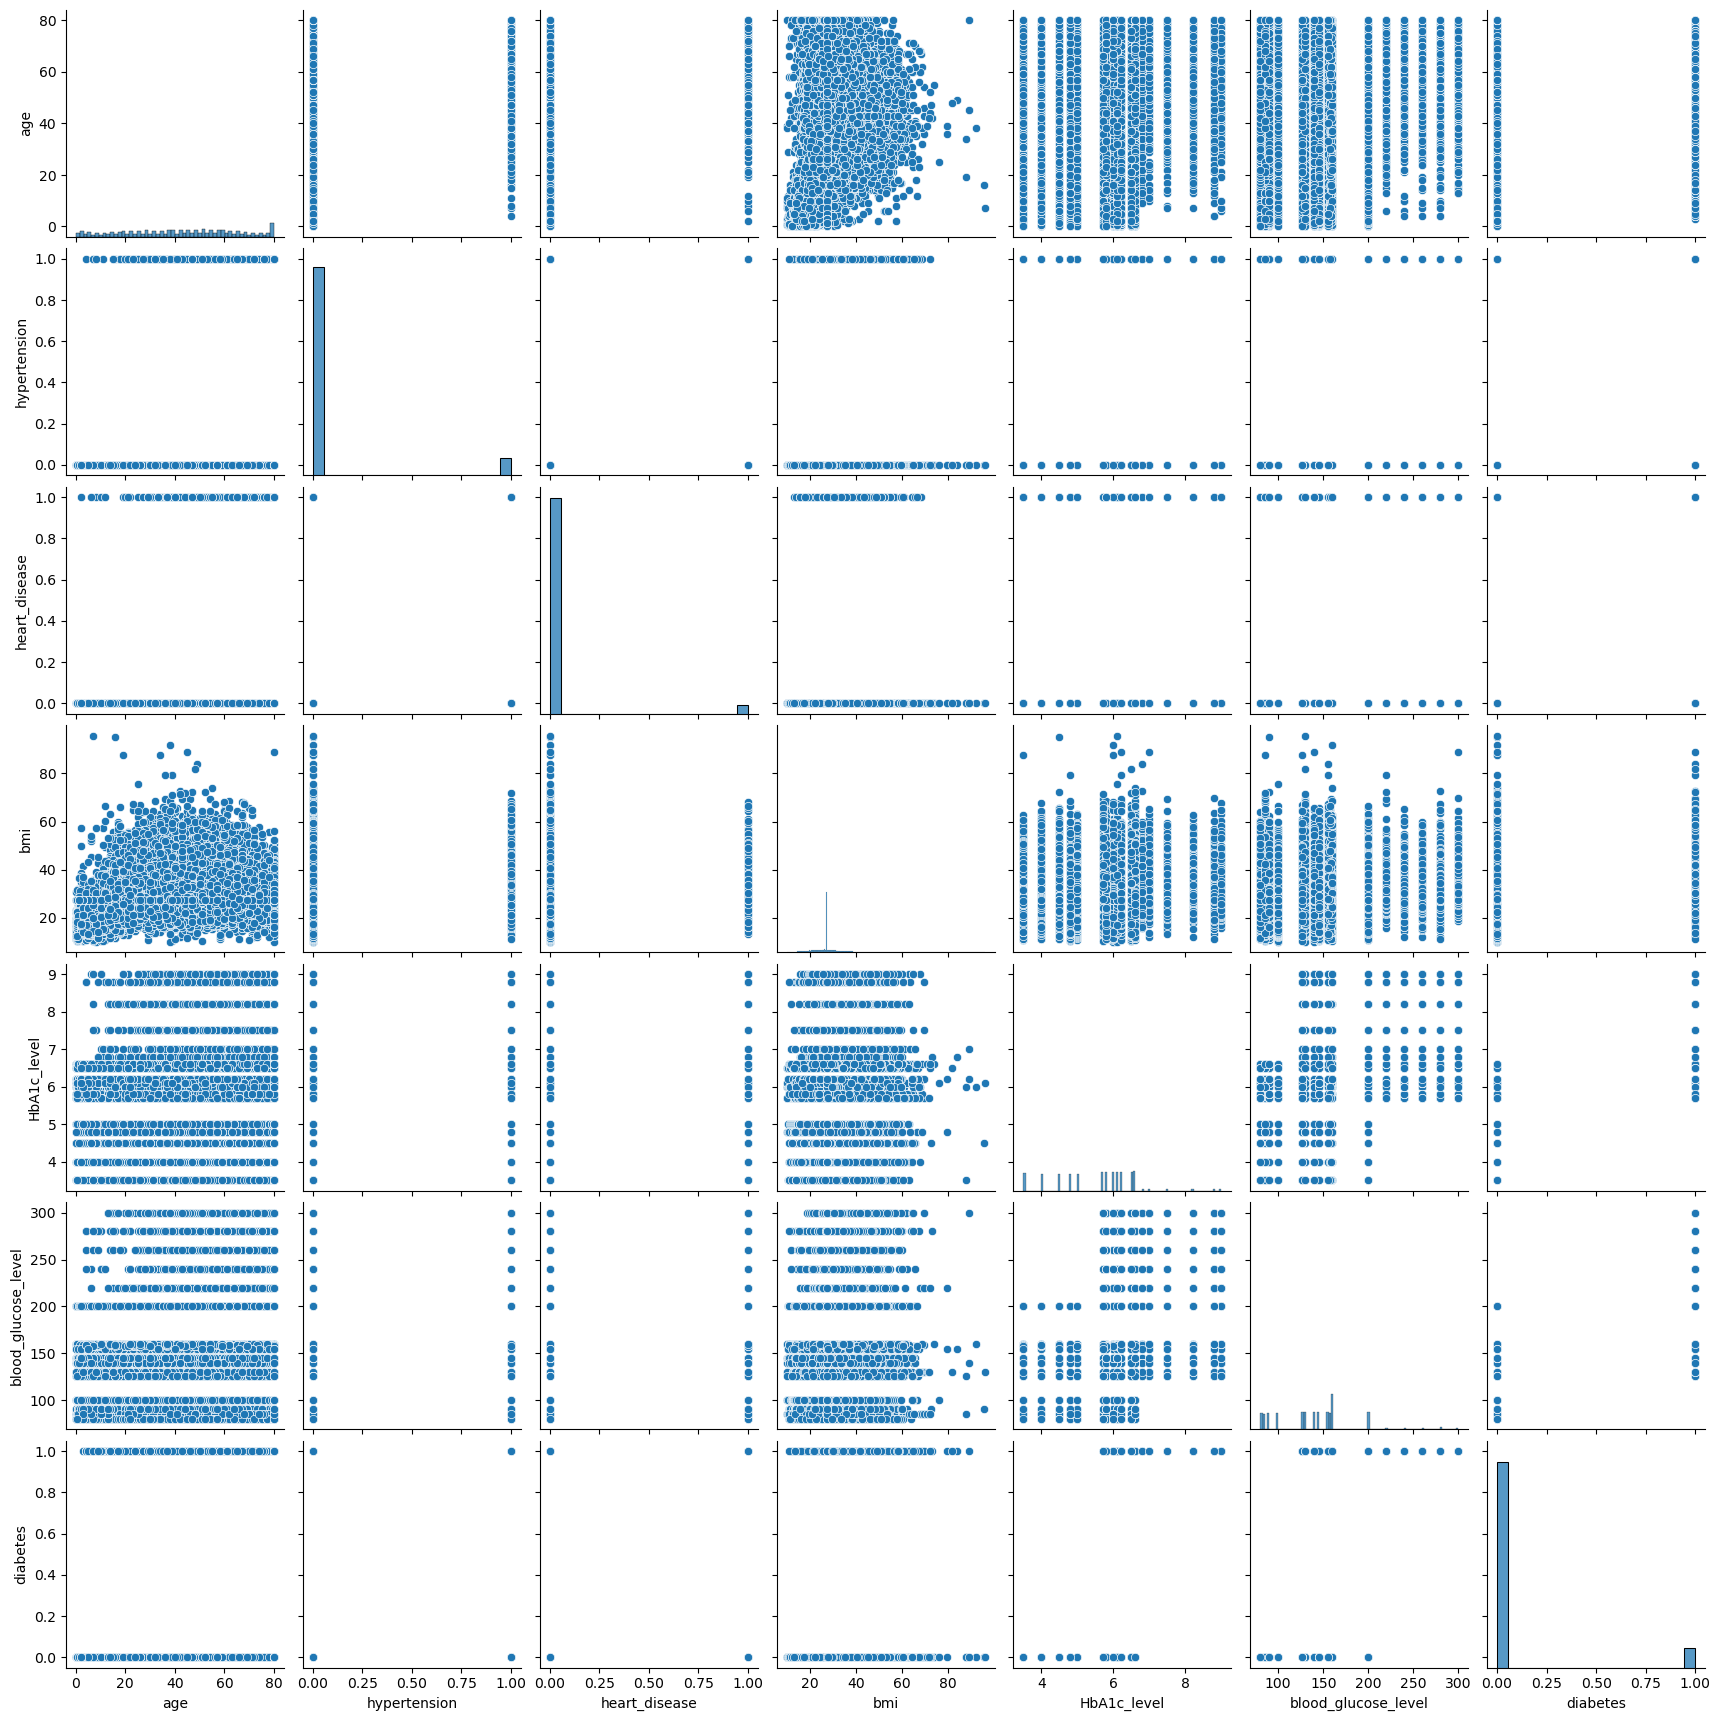

In [18]:
sns.pairplot(df)
plt.show()

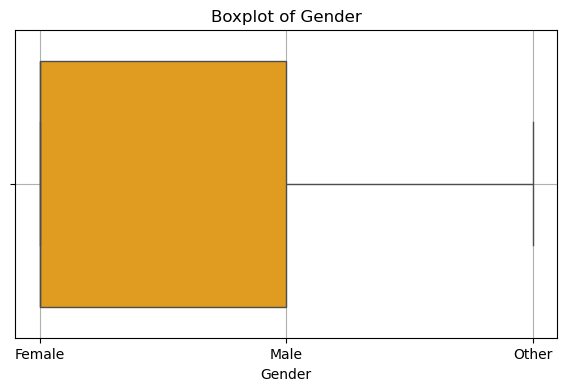

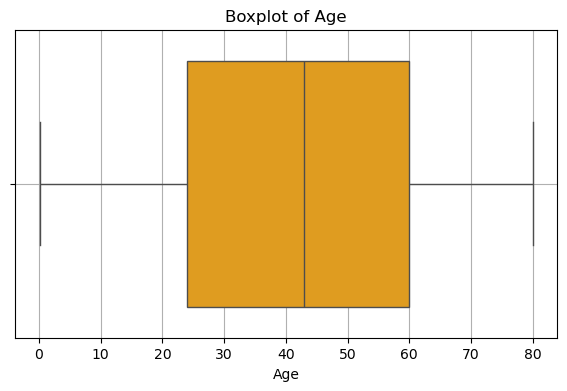

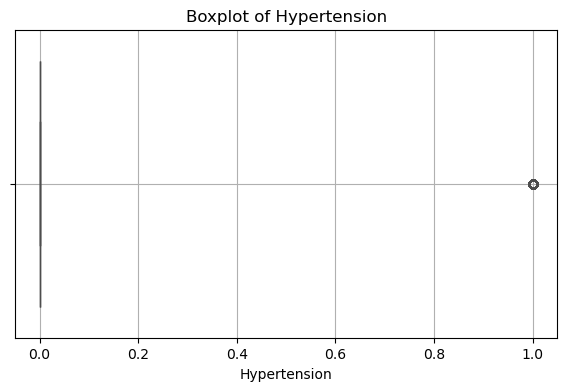

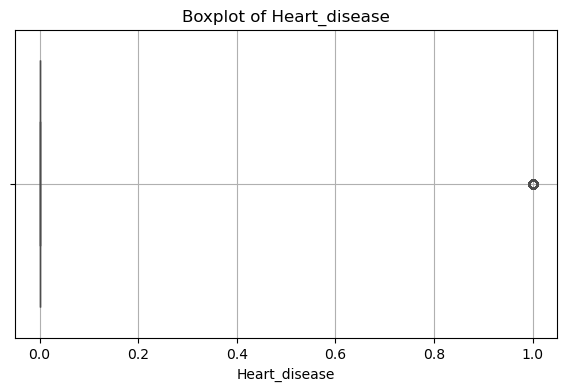

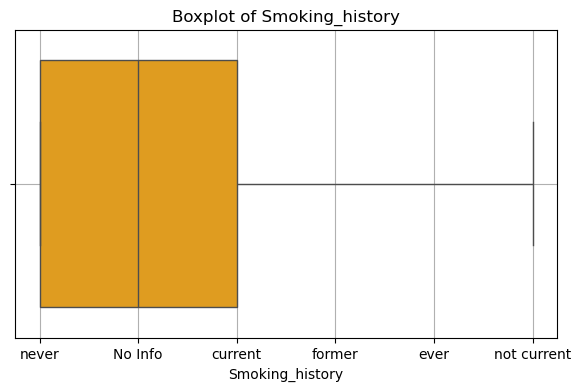

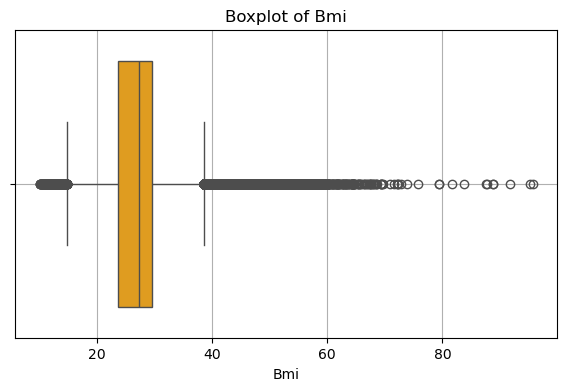

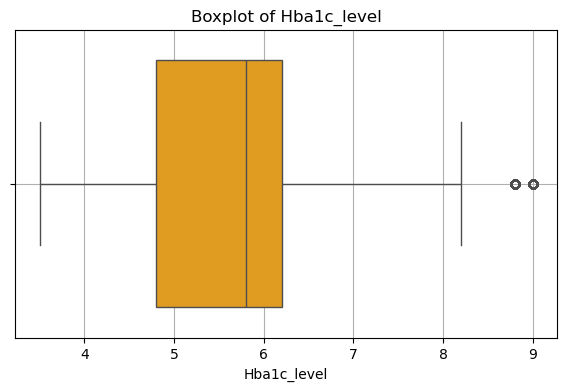

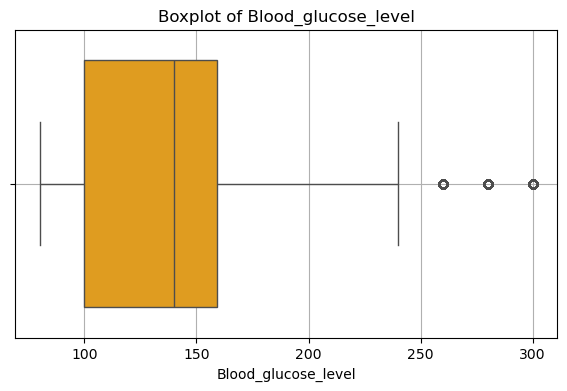

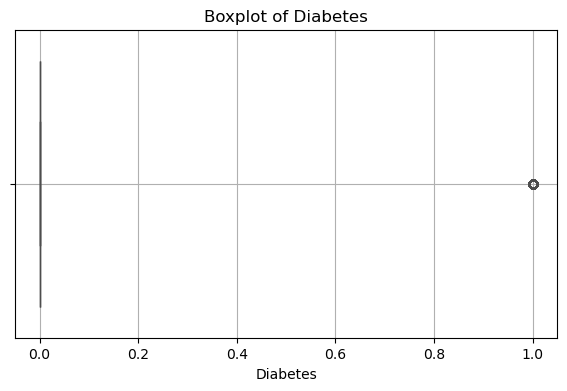

In [19]:
features = ['gender','age','hypertension' ,'heart_disease','smoking_history','bmi' ,'HbA1c_level' ,'blood_glucose_level' ,'diabetes']

for feature in features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f"Boxplot of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.grid(True)
    plt.show()


In [34]:
print("Original shape:", df.shape)

Original shape: (100000, 9)


In [35]:
target_col = 'diabetes'  # Replace with your actual target column name

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

print("Accuracy:", accuracy_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9605

Confusion Matrix:
 [[18122   178]
 [  612  1088]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000

Precision: 0.8593996840442338
Recall:    0.64
F1 Score:  0.7336480107889414
ROC-AUC Score: 0.9625377531340406


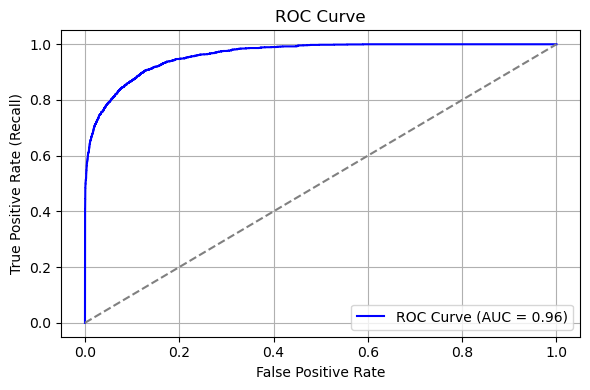

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))

print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:   ", recall_score(y_test, y_pred_thresh))
print("F1 Score: ", f1_score(y_test, y_pred_thresh))


Confusion Matrix:
[[17829   471]
 [  464  1236]]
Precision: 0.7240773286467487
Recall:    0.7270588235294118
F1 Score:  0.725565013208101


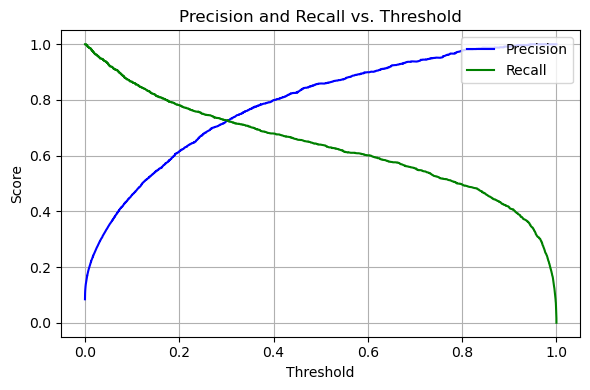

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend(loc='upper right')  # 🛠️ Fixed legend location
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# Get predicted probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Thresholds to test
thresholds = np.arange(0.1, 0.95, 0.05)

# Store results
results = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh, zero_division=0)
    rec = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    
    results.append((thresh, acc, prec, rec, f1))

# Print results
print("Threshold  Accuracy  Precision  Recall  F1 Score")
for r in results:
    print(f"{r[0]:.2f}      {r[1]:.4f}    {r[2]:.3f}      {r[3]:.3f}   {r[4]:.3f}")


Threshold  Accuracy  Precision  Recall  F1 Score
0.10      0.9023    0.460      0.864   0.601
0.15      0.9262    0.544      0.816   0.653
0.20      0.9399    0.615      0.782   0.689
0.25      0.9482    0.676      0.751   0.711
0.30      0.9533    0.724      0.727   0.726
0.35      0.9567    0.767      0.705   0.735
0.40      0.9582    0.799      0.679   0.734
0.45      0.9593    0.827      0.658   0.733
0.50      0.9605    0.859      0.640   0.734
0.55      0.9598    0.876      0.615   0.722
0.60      0.9604    0.900      0.601   0.721
0.65      0.9600    0.923      0.578   0.711
0.70      0.9590    0.938      0.555   0.697
0.75      0.9573    0.952      0.524   0.676
0.80      0.9563    0.978      0.497   0.659
0.85      0.9538    0.987      0.462   0.630
0.90      0.9500    0.992      0.415   0.585
